
# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - Ionosphere

In [20]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import math

## Load the Ionosphere dataset and remove missing/malformed data

In [21]:
# Load the Adult Census Dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"

# Open dataset using pandas and convert to numpy array
df = pd.read_csv(URL, delimiter=",", header=None)

# Remove any rows that have a ? or Nan(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')

# Display first 10 rows to get a picture of the data
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [22]:
# Change the last column to be 0 (bad radar) or 1 (good radar)
df.iloc[:,-1] = 1*(df.iloc[:,-1] == 'g')

# Drop second column because all 0s
df = df.drop(df.columns[[1]], axis=1)

#drop first column
df = df.drop(df.columns[[0]], axis=1)

df.head(5)

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,34
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [23]:
# Basic stats for each feature
df.describe()

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,34
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Split Data between Training and Test Data (70/30 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df.copy()
train_set = data_copy.sample(frac=0.50, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = float)
y_train = np.array(train_set.iloc[:, -1], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = float)
y_test = np.array(test_set.iloc[:, -1], dtype = int)


print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

print(y_train)

x_train size:  (176, 32)
y_train size:  (176,)
x_test size:  (175, 32)
y_test size:  (175,)
[1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1]


## Task 2 - Implement the Model

### Logistic Regression

In [25]:
class LogisticRegression:

    def __init__(self, intercept = True): 
        #self.num_steps = num_steps
        #self.leaning_rate = learning_rate
        #self.error_rate = error_rate
        self.intercept = intercept

    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis = 1)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
                  
                  
    def cost_function(self, X, y, w): #Cross Entropy Loss Function
        N,D = X.shape
        z = np.dot(X, w)
        
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
        grad = np.dot(X.T,(self.sigmoid(z) - y)) / N
        
        return grad, J
    
                  
    def gradient_descent(self, X, y, num_steps, learning_rate, min_error):
        # Min error is just the early termination requirement (Set up as Small change is objective right now)
        N,D = X.shape
        w = np.zeros(D)
        grad, J_previous = self.cost_function(X, y, w)
        
        for i in range(num_steps):
                grad, J = self.cost_function(X, y, w)
                w = w - (learning_rate * grad)
                
                if np.linalg.norm(grad) < min_error:
                #if np.abs(J - J_previous) < min_error: # Need to determine the best way to determine the early stopping point
                    break
                else:
                    J_previous = J
                  
        print("Number of Iterations = " + str(i))
        print("Minimum Cost (J) = " + str(J))          
        return w, J

    
    def fit(self, X, y, num_steps, learning_rate, min_error): #Logistic regression and Gradient Descent (Input is X and y, outputs weights of model)
        if self.intercept == True:
            X = self.add_intercept(X)
            
        
        #Gradient function
        w, J = self.gradient_descent(X, y, num_steps, learning_rate, min_error)
        
        print("Weights of Model: ", w)
        return w
    
    def predict(self, X, w): #Ouput is the predicted values for y
        if self.intercept == True:
            X = self.add_intercept(X)
        
        y_pred = self.sigmoid(np.dot(X, w))
        y_pred = y_pred.round() #Rounds the value to 1 or 0
        
        #print("y_pred Shape")
        #print(y_pred.shape)
        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        RN = TN + FN
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A  


### Naive Bayes

In [26]:
class NaiveBayes:
    
    def __init__(self):
        pass

    def fit(self, X, y):
        #X here is an array where the rows are the samples and the columns are the features
        n_instances, n_features = X.shape
        
        #We find the number of classes
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # We compute the  mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype= float)
        self._var = np.zeros((n_classes, n_features), dtype= float)
        
        # For each class we want one prior
        self._priors =  np.zeros(n_classes, dtype = float)

        for c in self._classes:
            #we select the samples that have the class c as an ouput and calculate mean and variance
            X_class = X[y == c]
            self._mean[c,:] = np.mean(X_class, axis=0)
            self._var[c,:] = np.var(X_class, axis=0)
            # we compute the frequency of the class
            # X_class.shape[0] returns the number of samples with Xc as a sample for the class c
            self._priors[c] = X_class.shape[0] / float(n_instances)
        #print(self._mean[1,:])
        #print(self._var[1,:])

    def predict(self, X):
        ypred = [self._predict(x) for x in X] #Gaussian Predict
        #print(ypred)
        return ypred

    def _predict(self, x):
        posteriors = []

        # compute the posterior probability for each class
        #we go through each class
        for c in self._classes:
            prior = np.log(self._priors[c])
            class_likelihood = np.sum(np.log(self._pdf(c, x)))
            posterior = prior + class_likelihood
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        #print(class_likelihood)
        #print(posteriors)
        return self._classes[np.argmax(posteriors)]
            

    # compute the probability density function, we model the class conditional probability with a Gaussian distribution
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        num = np.exp(- (x-mean)**2 / (2 * var))
        den = np.sqrt(2 * np.pi * var)
        return num / den
    
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        
        
        return A

### K-Fold Cross Validation

In [27]:
# Implement a K-Fold Validation for Logistic Regression
# Split the training set into K folds and determine the average accuracy

def cross_validation_LR(model, x_train, y_train, K, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        w = model.fit(x_training, y_training, num_steps, learning_rate, min_error)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val, w)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

In [28]:
# Implement a K-Fold Validation for Naive Bayes
# Split the training set into K folds and determine the average accuracy

def cross_validation_NB(model, x_train, y_train, K, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        model.fit(x_training, y_training)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

## Task 3 - Run Experiments

Run Models and test accuracy over varying parameters

### Cross Validation on Logistic Regression

In [29]:
Model_Logistic_Regression = LogisticRegression(intercept = True)

In [12]:
cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.001, min_error = 1e-2, random_shuffle = False)

Number of Iterations = 24999
Minimum Cost (J) = 0.3487517726342945
Weights of Model:  [-0.73827413  0.89287021  0.43489695  0.75425179  0.32770234  0.45477425
  0.31404698  0.15065383 -0.06943224  0.17562705  0.40144608 -0.25755323
  0.69282106  0.12357828  0.05662153 -0.29917623  0.26100943  0.07078097
 -0.0094869   0.32584032 -0.92843509  0.00195491  0.11385322  0.05862327
  0.3860337  -0.94722142 -0.11433284  0.06796025 -0.07627836  0.60088413
 -0.12025706  0.14575873 -0.4018731 ]
Accuracy:  85.71428571428571 %
Error Rate:  14.285714285714285 %
Precision:  80.76923076923077 %
Recall:  100.0 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.3527038922871107
Weights of Model:  [-0.80734137  0.69671686  0.42112968  0.65230899  0.25585146  0.71630862
  0.37514694  0.221883   -0.01203077  0.02692866  0.20431752 -0.26255237
  0.95226648  0.08724207  0.17069342 -0.11926193  0.18416341 -0.01090331
 -0.02504887  0.49990955 -0.72205034 -0.16099372  0.12322648  0.27658419
  0.21884452 -0.8

83.42857142857143

### Cross Validation of Naive Bayes

In [13]:
Model_Naive_Bayes = NaiveBayes()

In [14]:
cross_validation_NB(Model_Naive_Bayes, x_train, y_train, K = 5, random_shuffle = False)

Accuracy:  82.85714285714286 %
Error Rate:  17.142857142857142 %
Precision:  94.11764705882352 %
Recall:  76.19047619047619 % 

Accuracy:  91.42857142857143 %
Error Rate:  8.571428571428571 %
Precision:  94.44444444444444 %
Recall:  89.47368421052632 % 

Accuracy:  80.0 %
Error Rate:  20.0 %
Precision:  89.47368421052632 %
Recall:  77.27272727272727 % 

Accuracy:  77.14285714285715 %
Error Rate:  22.857142857142858 %
Precision:  78.26086956521739 %
Recall:  85.71428571428571 % 

Accuracy:  80.0 %
Error Rate:  20.0 %
Precision:  85.71428571428571 %
Recall:  70.58823529411765 % 

average cross validation model accuracy = 82.28571428571429% 



82.28571428571429

### Test Accuracy of Models with Varying Parameters

Number of Iterations = 440
Minimum Cost (J) = 0.16553851546146872
Weights of Model:  [-2.16084608  2.54719289  1.36185523  1.56755024  1.65215374  0.30543017
  1.42195177  0.25352675 -0.44635657 -0.16196165  0.39160765 -0.09590827
  2.60388147  0.25225972 -0.49822472 -1.11166016  0.73252752 -0.15971555
 -0.23082455  1.23241997 -4.28156664  1.04294469  1.51645047  0.80291638
  3.20750059 -4.39651458 -0.91863538  0.41631964  0.27644347  2.68907807
 -0.07576799  0.2833779  -2.01020784]
Accuracy:  85.71428571428571 %
Error Rate:  14.285714285714285 %
Precision:  83.33333333333334 %
Recall:  95.23809523809523 % 

Number of Iterations = 382
Minimum Cost (J) = 0.19355149839776364
Weights of Model:  [-2.71741971  1.986177    1.1301391   2.22971889  1.17305851  1.63095839
  1.22833813  0.07877091 -0.54518943 -1.01907465 -0.03304345 -0.64571108
  3.00306751  0.84489566 -0.272421   -0.54150778  1.12501551 -0.21985281
 -0.64140162  1.95535081 -3.53847674  0.15568651  0.76527554  1.17512674
  1.678

Number of Iterations = 3964
Minimum Cost (J) = 0.15523729348095303
Weights of Model:  [-2.392993    1.51415075  0.95832303  2.5783589   1.04534789  1.68499861
  0.79646446  0.082108    0.03292584  0.48473686  0.04374302 -0.68588535
  1.6960408   0.22509444 -0.93685369 -0.9005764   1.62263194 -1.30089401
  1.3607849   1.99903169 -3.78398943  0.32703051  0.55905295  2.01622057
  2.07013948 -4.09517119 -0.90117467  0.92133064  0.80304433  1.67274189
 -0.5597873  -0.55911706 -1.75344747]
Accuracy:  77.14285714285715 %
Error Rate:  22.857142857142858 %
Precision:  71.42857142857143 %
Recall:  88.23529411764706 % 

average cross validation model accuracy = 83.42857142857143% 

Number of Iterations = 8804
Minimum Cost (J) = 0.16561282489479875
Weights of Model:  [-2.15825168  2.54453627  1.36125035  1.56554995  1.64803303  0.30616556
  1.41988982  0.25404143 -0.44580051 -0.16110139  0.39158838 -0.09637788
  2.59853289  0.25160049 -0.49645042 -1.10908917  0.73151476 -0.15976058
 -0.23072433  1

Number of Iterations = 49999
Minimum Cost (J) = 0.16867181201489875
Weights of Model:  [-2.32456149  1.62075945  1.13495237  2.04402412  0.82009096  1.29015886
  2.49082271  0.06822286 -0.36715866 -0.0256821   0.11347544 -0.99875929
  1.86715367  1.03322638 -1.02476767  0.04065295  0.46891032  0.66667687
 -0.73617589  0.29724803 -2.44027446  0.77264579  0.83930377  0.47064927
  1.87437776 -2.71911581 -0.17811486  0.21136221  0.27809586  1.06055666
 -0.35545585 -0.24739249 -2.49619772]
Accuracy:  88.57142857142857 %
Error Rate:  11.428571428571429 %
Precision:  84.0 %
Recall:  100.0 % 

Number of Iterations = 49999
Minimum Cost (J) = 0.17518069480470827
Weights of Model:  [-2.13606004  1.37595198  0.93613701  2.23558875  0.80912355  1.56227119
  0.67508616  0.07337495  0.03383946  0.51384163  0.01558567 -0.68037805
  1.48415969  0.22589261 -0.73216358 -0.67412826  1.28674261 -0.98472648
  1.07505292  1.51834195 -3.16497283  0.28920643  0.3753203   1.58598749
  1.6626762  -3.27698718 -0.

Number of Iterations = 49999
Minimum Cost (J) = 0.4599090376982025
Weights of Model:  [-0.23137233  0.36239947  0.02996446  0.35367782  0.19224601  0.33417575
  0.14813281  0.14169669  0.04768719  0.07337904  0.17245734  0.02051626
  0.31544265  0.13035401  0.12244907 -0.10616411  0.06883992  0.05520157
  0.08478857  0.20042984 -0.20369987  0.04285926 -0.04413905  0.03079631
  0.06281106 -0.31333699  0.03512964  0.10466469 -0.11217411  0.11798479
 -0.0037886   0.11304588 -0.0640508 ]
Accuracy:  82.85714285714286 %
Error Rate:  17.142857142857142 %
Precision:  78.57142857142857 %
Recall:  100.0 % 

Number of Iterations = 49999
Minimum Cost (J) = 0.46450585880969386
Weights of Model:  [-0.20090043  0.30021935  0.10778158  0.3681888   0.15639827  0.30956991
  0.17560728  0.16737349  0.05338096  0.14124638  0.15090677 -0.01756437
  0.28472196  0.12572721  0.00840832 -0.05247289  0.11432392  0.04043872
 -0.00318984  0.1525328  -0.20537188  0.00190216  0.06272838  0.03719026
  0.01107605 -0.

Text(0, 0.5, 'Model Accuracy (%)')

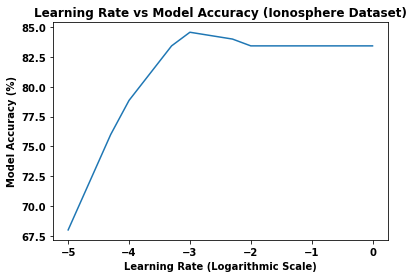

In [22]:
#Test Logisitc Regression over different learning rates

#May need to play around with num_steps and min_error (stopping requirement)

#Initialize
learning_rates = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
lr_accuracy = []

for learning_rate in learning_rates:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 50000, learning_rate = learning_rate, min_error = 1e-2, random_shuffle = False)
    lr_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(np.log10(learning_rates), lr_accuracy)
plt.title("Learning Rate vs Model Accuracy (Ionosphere Dataset)")
plt.xlabel("Learning Rate (Logarithmic Scale)")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 0
Minimum Cost (J) = 0.6931471805599454
Weights of Model:  [ 6.73758865e-04  1.76953404e-03  3.55230142e-04  1.63048085e-03
  4.44089362e-04  1.49176312e-03  4.98259220e-04  1.04525284e-03
  4.11403901e-04  9.55132979e-04  7.62880851e-04  6.04940071e-04
  7.55067730e-04  8.18829078e-04  4.56346099e-04  3.33975177e-04
  3.95096099e-04  6.26643972e-04  1.05986170e-04  8.20604255e-04
 -4.23118085e-04  4.25286170e-04  6.29726950e-05  5.36827305e-04
 -3.88521277e-05 -1.53028369e-04 -4.87755319e-05  7.03598936e-04
 -2.69659220e-04  1.07816525e-03 -1.83485816e-04  8.79220567e-04
 -3.33898582e-04]
Accuracy:  65.71428571428571 %
Error Rate:  34.285714285714285 %
Precision:  63.63636363636363 %
Recall:  100.0 % 

Number of Iterations = 0
Minimum Cost (J) = 0.6931471805599454
Weights of Model:  [ 8.15602837e-04  1.71021844e-03  3.31039716e-04  1.66898936e-03
  4.54164894e-04  1.76251170e-03  5.59465603e-04  1.16545603e-03
  4.54489362e-04  9.64354965e-04  5.99741135e-04  7.

Number of Iterations = 931
Minimum Cost (J) = 0.40693351207729506
Weights of Model:  [-0.40273332  0.422091    0.16863572  0.52493422  0.24047623  0.41680925
  0.28306054  0.2024619   0.04103454  0.17588086  0.20467849 -0.08840855
  0.42771523  0.15765547 -0.03795534 -0.10650456  0.17220007  0.05364814
 -0.01890452  0.20705307 -0.35971768 -0.00092451  0.10258424  0.04031974
  0.05227535 -0.50909591  0.0479063   0.11845298 -0.152367    0.26139641
 -0.11382843  0.15482386 -0.29176894]
Accuracy:  82.85714285714286 %
Error Rate:  17.142857142857142 %
Precision:  77.77777777777779 %
Recall:  100.0 % 

Number of Iterations = 880
Minimum Cost (J) = 0.41853902953173944
Weights of Model:  [-0.33174599  0.38032423  0.11254048  0.5166523   0.19017708  0.41354461
  0.10455797  0.16004873  0.09749888  0.16517656  0.13783984 -0.01418068
  0.42229412  0.15431585  0.09257722 -0.09092432  0.25735784 -0.08182401
  0.16667191  0.16614867 -0.30600864 -0.00747132  0.02979884  0.19277852
  0.15643904 -0.481

Number of Iterations = 38286
Minimum Cost (J) = 0.1935751702818072
Weights of Model:  [-2.71441197  1.98474286  1.12906922  2.22652966  1.17057691  1.6293855
  1.22677363  0.07959218 -0.54503239 -1.01726366 -0.03273132 -0.645315
  2.9995068   0.84237152 -0.27075509 -0.53935062  1.12357966 -0.21935589
 -0.64103798  1.9514871  -3.533509    0.15605009  0.76430391  1.17365596
  1.67511299 -3.41073359 -0.5789743   0.3234673   1.18982202  1.37672906
 -0.68799957  0.04845235 -1.5302309 ]
Accuracy:  91.42857142857143 %
Error Rate:  8.571428571428571 %
Precision:  90.0 %
Recall:  94.73684210526315 % 

Number of Iterations = 38063
Minimum Cost (J) = 0.12869976259625027
Weights of Model:  [-3.30119736  2.86254735 -0.560662    2.59949519  1.39655704  1.23746421
  1.10155306  0.37780356 -0.00575842 -0.43502605  1.21441724  0.1593256
  3.26813746  1.07187495  0.05987675 -1.26972013 -0.47648813  0.61176366
  0.42462561  1.52966187 -3.81141821  1.63618469 -0.12003    -0.17742494
  1.78577491 -3.097327

Number of Iterations = 49999
Minimum Cost (J) = 0.16012536385221623
Weights of Model:  [-2.22652328  2.62226011  1.37927492  1.57899765  1.79483972  0.26196578
  1.47865477  0.29303404 -0.4674813  -0.19541825  0.40108908 -0.01630673
  2.74538118  0.23785952 -0.53908285 -1.19712135  0.75816515 -0.20273334
 -0.23814841  1.26558556 -4.51941103  1.11907045  1.65501594  0.86263706
  3.38801003 -4.64858925 -0.98454878  0.49429145  0.29418515  2.84335343
 -0.0710716   0.33986979 -2.11478706]
Accuracy:  85.71428571428571 %
Error Rate:  14.285714285714285 %
Precision:  83.33333333333334 %
Recall:  95.23809523809523 % 

Number of Iterations = 49999
Minimum Cost (J) = 0.1837940695610838
Weights of Model:  [-2.94983595  2.10659097  1.15917157  2.49534008  1.37486179  1.65572192
  1.32698235  0.02809067 -0.57140151 -1.31660666 -0.04181735 -0.5292507
  3.33902164  1.05980924 -0.33189827 -0.66379881  1.27564654 -0.29531584
 -0.71228991  2.15773713 -3.9309678   0.28991082  0.83112576  1.30663381
  1.8

Text(0, 0.5, 'Model Accuracy (%)')

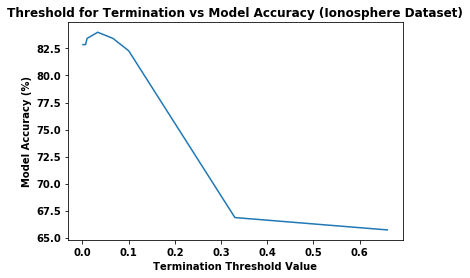

In [25]:
#Threshold of change in value of cost function as termination criteria
#Test Logisitc Regression over different thresholds of cost function improvement

#Initialize
termination_thresholds = [0.66, 0.33, 0.1, 0.066, 0.033, 0.01, 0.0066, 0.0033, 0.001] 
termination_accuracy = []

for threshold in termination_thresholds:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 50000, learning_rate = 0.01, min_error = threshold, random_shuffle = False)
    termination_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(termination_thresholds, termination_accuracy)
plt.title("Threshold for Termination vs Model Accuracy (Ionosphere Dataset)")
plt.xlabel("Termination Threshold Value")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 99
Minimum Cost (J) = 0.6011083168602769
Weights of Model:  [ 0.01330184  0.12792306  0.03374734  0.11420735  0.03678095  0.10238099
  0.04160233  0.06274903  0.03009455  0.05637205  0.06530587  0.02290297
  0.07080375  0.04618385  0.03621771  0.0017658   0.03452191  0.03025185
  0.01016404  0.04976651 -0.04712644  0.01038455  0.00776685  0.02139401
  0.00180471 -0.04776401 -0.00603667  0.03712504 -0.0238449   0.07540118
 -0.01839094  0.05403238 -0.03082633]
Accuracy:  71.42857142857143 %
Error Rate:  28.57142857142857 %
Precision:  67.74193548387096 %
Recall:  100.0 % 

Number of Iterations = 99
Minimum Cost (J) = 0.5894906975115294
Weights of Model:  [ 0.01940602  0.11570522  0.0316909   0.11029114  0.03591174  0.12261692
  0.04788079  0.06930639  0.03490731  0.04982154  0.04895614  0.03241578
  0.09101134  0.05512728  0.039684    0.02046897  0.02820191  0.02473428
  0.01282783  0.07044167 -0.0313279   0.01433632  0.01207376  0.05218278
  0.00248473 -0.03522596

Number of Iterations = 999
Minimum Cost (J) = 0.40739044255724566
Weights of Model:  [-0.37873955  0.40537215  0.1248439   0.55399097  0.20633063  0.44069726
  0.11035872  0.16399454  0.09741567  0.17372925  0.14278846 -0.02682562
  0.45459104  0.15907395  0.09038851 -0.10368002  0.27713156 -0.0944121
  0.17988732  0.18016243 -0.34755132 -0.00902518  0.02931484  0.21055153
  0.17472791 -0.5284666   0.09177154  0.10735471 -0.1629731   0.24883539
 -0.12353363  0.1567187  -0.23286259]
Accuracy:  77.14285714285715 %
Error Rate:  22.857142857142858 %
Precision:  71.42857142857143 %
Recall:  88.23529411764706 % 

average cross validation model accuracy = 82.85714285714286% 

Number of Iterations = 1999
Minimum Cost (J) = 0.3676537088403838
Weights of Model:  [-6.40011139e-01  7.97862696e-01  3.73199611e-01  6.75984662e-01
  2.91069843e-01  4.29799397e-01  2.80293502e-01  1.49491002e-01
 -3.81126519e-02  1.68845971e-01  3.79693150e-01 -2.18029671e-01
  6.17154605e-01  1.18426356e-01  7.438525

Number of Iterations = 4999
Minimum Cost (J) = 0.26351981637588595
Weights of Model:  [-1.23655317  0.98241401  0.5394323   1.2009046   0.55519833  0.76708851
  0.94300963  0.20203083 -0.15125151  0.22800832  0.29347494 -0.46587217
  0.96168397  0.32923625 -0.47133313 -0.20996739  0.35190724  0.23434789
 -0.16629094  0.37079518 -1.20392766  0.2202017   0.34315732  0.17076945
  0.53789985 -1.25349936  0.0845015   0.13612267 -0.10254633  0.51285454
 -0.24597833  0.04753697 -1.0094724 ]
Accuracy:  85.71428571428571 %
Error Rate:  14.285714285714285 %
Precision:  80.76923076923077 %
Recall:  100.0 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.27492572648554797
Weights of Model:  [-1.18253549  0.85647167  0.48310651  1.22438276  0.41972089  0.90781148
  0.24594324  0.16617007  0.03942981  0.34508835  0.14848231 -0.33214486
  0.92235697  0.19346197 -0.10556729 -0.29703193  0.57116024 -0.36877495
  0.43164239  0.53170878 -1.35508685  0.0507979   0.05308647  0.63251651
  0.62256622 -1.3

Number of Iterations = 14999
Minimum Cost (J) = 0.2352409567462734
Weights of Model:  [-1.97029321  1.48287549  0.98987718  1.51988754  0.63566451  1.37448687
  0.83939318  0.21002949 -0.36813652 -0.31410137  0.07422291 -0.71935161
  2.06607824  0.30237772 -0.05022655 -0.26323466  0.62401367 -0.04491613
 -0.39760414  1.28193513 -2.31423873 -0.13551712  0.51888848  0.78841312
  1.0210533  -2.1517075  -0.37376236  0.23988333  0.68560058  0.83667878
 -0.44696851  0.24673936 -0.90345703]
Accuracy:  91.42857142857143 %
Error Rate:  8.571428571428571 %
Precision:  90.0 %
Recall:  94.73684210526315 % 

Number of Iterations = 14999
Minimum Cost (J) = 0.16913160803921162
Weights of Model:  [-2.41192189  2.10623262 -0.11311995  1.88454372  0.95731791  1.14360014
  0.83278933  0.3546348  -0.14572478 -0.17194305  0.81319564 -0.13375055
  2.21481046  0.69002159  0.24721104 -0.78453296 -0.15581295  0.46863727
  0.21490693  1.08858208 -2.51635757  0.90782451 -0.28986098 -0.09381012
  1.12591025 -2.07

Number of Iterations = 44021
Minimum Cost (J) = 0.16561576821901058
Weights of Model:  [-2.15814451  2.54442684  1.3612257   1.56546569  1.64786385  0.30619538
  1.41980446  0.25406315 -0.44577716 -0.16106485  0.3915883  -0.09639532
  2.59831277  0.25157109 -0.49637762 -1.10898444  0.73147289 -0.15976314
 -0.23071942  1.22853231 -4.27339424  1.04258935  1.51246166  0.80193685
  3.2011009  -4.38869827 -0.91762788  0.41453072  0.27648337  2.68299325
 -0.07522203  0.28283981 -2.0068609 ]
Accuracy:  85.71428571428571 %
Error Rate:  14.285714285714285 %
Precision:  83.33333333333334 %
Recall:  95.23809523809523 % 

Number of Iterations = 38286
Minimum Cost (J) = 0.1935751702818072
Weights of Model:  [-2.71441197  1.98474286  1.12906922  2.22652966  1.17057691  1.6293855
  1.22677363  0.07959218 -0.54503239 -1.01726366 -0.03273132 -0.645315
  2.9995068   0.84237152 -0.27075509 -0.53935062  1.12357966 -0.21935589
 -0.64103798  1.9514871  -3.533509    0.15605009  0.76430391  1.17365596
  1.675

Text(0, 0.5, 'Model Accuracy (%)')

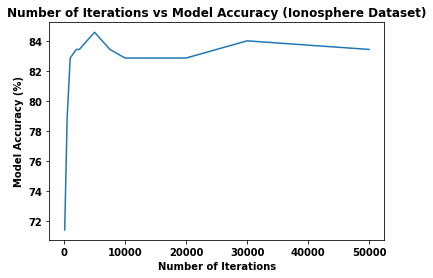

In [26]:
#Plot Accuracy of Train/Validation Set as a Function of Iterations of Gradient Descent
#Limit number of steps

#Initialize
number_of_iterations = [100, 500, 1000, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 50000]
iter_accuracy = []

for num_steps in number_of_iterations:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = num_steps, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
    iter_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(number_of_iterations, iter_accuracy)
plt.title("Number of Iterations vs Model Accuracy (Ionosphere Dataset)")
plt.xlabel("Number of Iterations")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 4999
Minimum Cost (J) = 0.2940269682629395
Weights of Model:  [-1.06234168  1.22699421  0.67319634  1.01618156  0.46027201  0.51485085
  0.45526325  0.14274583 -0.18311148  0.18372911  0.44524034 -0.37602306
  0.96576991  0.14802674 -0.02192697 -0.40381091  0.32966262  0.0833392
 -0.04672809  0.47162914 -1.46025613  0.11418481  0.22430535  0.15776309
  0.78057814 -1.38803592 -0.20766473  0.04163482  0.00306283  0.86719133
 -0.13236359  0.11444512 -0.64639706]
Accuracy:  88.57142857142857 %
Error Rate:  11.428571428571429 %
Precision:  84.0 %
Recall:  100.0 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.30158271960357114
Weights of Model:  [-1.21620269  0.96323062  0.64410666  0.9329412   0.34634076  0.95092842
  0.50073179  0.24991151 -0.1304047  -0.02742632  0.17987619 -0.44641514
  1.32576576  0.09351013  0.12477414 -0.15768051  0.25958943  0.00362533
 -0.12754201  0.73298429 -1.20511952 -0.18940414  0.22002576  0.43779469
  0.44436992 -1.25771064 -0.1868

Number of Iterations = 4999
Minimum Cost (J) = 0.23907124718532052
Weights of Model:  [-1.42916137  1.15580808  0.22737691  1.34714047  0.60825077  0.90472612
  0.02726957  0.19555869  0.40384813  0.11359982  0.08050797 -0.19844859
  0.81881716  0.28029492  0.02665963 -0.30248177  0.52404153 -0.29288388
  0.48705625  0.67925565 -1.53261282  0.14595938 -0.17131632  0.43396188
  0.42434212 -1.41122193  0.24009705  0.3746666   0.04675696  0.36304666
 -0.32594651 -0.10852063 -0.48439143]
Accuracy:  76.92307692307693 %
Error Rate:  23.076923076923077 %
Precision:  76.19047619047619 %
Recall:  94.11764705882352 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.2313560203712893
Weights of Model:  [-1.09243632  0.67112048  0.50213843  1.3318401   0.45893199  0.93677478
  0.72658822  0.14555993  0.11776127  0.55376875  0.07846044 -0.48381185
  0.70123002  0.25271646 -0.73282872 -0.11733376  0.64288873 -0.26053485
  0.3034287   0.26806638 -1.10646639  0.21014976  0.28678503  0.59082562
  0.54

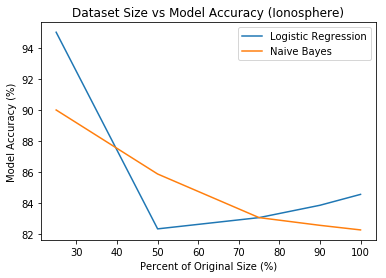

In [30]:
#Adjust size of datasets and compare accuracy
#Compare 5 different sizes

length = int(len(x_train))
length90 = int(length*0.9)
length75 = int(length*0.75)
length50 = int(length*0.5)
length25 = int(length*0.25)
length10 = int(length*0.1)

x_train_reduced = [x_train[:length90,:], x_train[:length75,:], x_train[:length50,:], x_train[:length25,:], x_train[:length10,:]] 
y_train_reduced = [y_train[:length90], y_train[:length75], y_train[:length50], y_train[:length25], y_train[:length10]]
percentage_of_original = [100, 90, 75, 50, 25]
lr_accuracy = []
nb_accuracy = []

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train, y_train, K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)


lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length90,:], y_train[:length90], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length90,:], y_train[:length90], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length75,:], y_train[:length75], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length75,:], y_train[:length75], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length50,:], y_train[:length50], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length50,:], y_train[:length50], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length25,:], y_train[:length25], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length25,:], y_train[:length25], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

#lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length10,:], y_train[:length10], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
#nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length10,:], y_train[:length10], K = 5, random_shuffle = False)
#lr_accuracy.append(lr_average_cross_validation_accuracy)
#nb_accuracy.append(nb_average_cross_validation_accuracy)
        

#Plot
plt.plot(percentage_of_original, lr_accuracy)
plt.plot(percentage_of_original, nb_accuracy)
plt.title("Dataset Size vs Model Accuracy (Ionosphere)")
plt.xlabel("Percent of Original Size (%)")
plt.ylabel("Model Accuracy (%)")
plt.legend(["Logistic Regression", "Naive Bayes"])


Number of Iterations = 24999
Minimum Cost (J) = 0.3410537043629685
Weights of Model:  [-0.85638532  0.78252225  0.30785787  0.81357127  0.36554843  0.62454448
  0.36226719  0.20886933 -0.03129928  0.13531188  0.29286616 -0.21881757
  0.80244685  0.18157687  0.04793879 -0.24488446  0.24758052  0.0321033
  0.06092773  0.39887572 -0.8382065   0.0219754   0.07251745  0.16110787
  0.31379396 -0.93202895  0.00431343  0.15158366 -0.11737983  0.37533853
 -0.13981169  0.14950772 -0.37223509]
Accuracy:  86.85714285714286 %
Error Rate:  13.142857142857142 %
Precision:  85.81560283687944 %
Recall:  97.58064516129032 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.33978208567859197
Weights of Model:  [-0.93919796  0.76794847  0.39354459  0.87787263  0.25889614  0.65277664
  0.33033962  0.17887143  0.04076479  0.12423145  0.30567756 -0.12822813
  0.84693811  0.13965288  0.00722385 -0.22679809  0.2706855  -0.03894876
  0.1041202   0.21434372 -0.82705639  0.06142833  0.1307915   0.31226067
  0.2

/Users/danniefu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


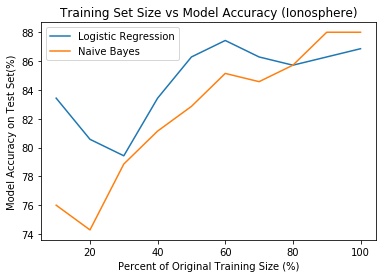

In [32]:
#The Accuracy of the Test set based on different sizes of the training set
#Need to choose optimum hyper-parameters on Logistic Regression

length = int(len(x_train))
length90 = int(length*0.90)
length80 = int(length*0.80)
length70 = int(length*0.70)
length60 = int(length*0.60)
length50 = int(length*0.50)
length40 = int(length*0.40)
length30 = int(length*0.30)
length20 = int(length*0.20)
length10 = int(length*0.10)

x_train_reduced = [x_train, x_train[:length90,:], x_train[:length80,:], x_train[:length70,:],x_train[:length60,:], x_train[:length50,:], x_train[:length40,:],x_train[:length30,:], x_train[:length20,:], x_train[:length10,:]] 
y_train_reduced = [y_train, y_train[:length90], y_train[:length80], y_train[:length70], y_train[:length60], y_train[:length50], y_train[:length40], y_train[:length30], y_train[:length20], y_train[:length10]]
percentage_of_original = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
LR_accuracy = []
NB_accuracy = []


model_LR = LogisticRegression(intercept = True)
for i in range(len(x_train_reduced)):
    w = model_LR.fit(x_train_reduced[i], y_train_reduced[i], num_steps = 25000, learning_rate = 0.001, min_error = 0.0066)            
    
    y_pred = model_LR.predict(x_test, w)
    
    accuracy = model_LR.evaluate_acc(y_test, y_pred)
    LR_accuracy.append(accuracy)


model_NB = NaiveBayes()
for i in range(len(x_train_reduced)):
    model_NB.fit(x_train_reduced[i], y_train_reduced[i])
    
    y_pred = model_NB.predict(x_test)
    
    accuracy = model_NB.evaluate_acc(y_test,y_pred)
    NB_accuracy.append(accuracy)
    

#Plot
plt.plot(percentage_of_original, LR_accuracy)
plt.plot(percentage_of_original, NB_accuracy)
plt.title("Training Set Size vs Model Accuracy (Ionosphere)")
plt.xlabel("Percent of Original Training Size (%)")
plt.ylabel("Model Accuracy on Test Set(%)")
plt.legend(["Logistic Regression", "Naive Bayes"])
